### Este script es un clasificador de sombras de agujeros negros

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


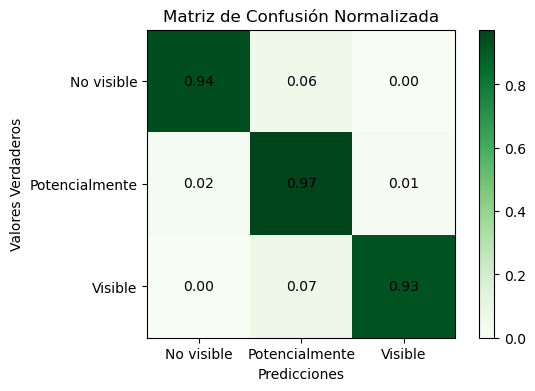


Exactitud del modelo: 0.955


In [25]:
#Cargar el CSV con la nueva columna 'Clase'
data = pd.read_csv('/Users/benx/Documents/PythonCodes/DeepLearningDataBased/datos/bh_data_renew_con_clase.csv')


# Dividimos los datos en características (X) y objetivos (y)
X = data.iloc[:, :2].values  # Características
y = data.iloc[:, 3].values   # Columna 'Clase' como objetivo

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalamos las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Entrenamos el clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_classifier.fit(X_train, y_train)

# Realizakos predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

#Evaluamos el rendimiento con una matriz de confusión normalizada
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
accuracy = accuracy_score(y_test, y_pred)

# Visualizamos la matriz 
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Greens')
plt.title("Matriz de Confusión Normalizada")
plt.colorbar()

# Considerando 3 clases: -1, 0, 1
classes = ["No visible", "Potencialmente", "Visible"]
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('Valores Verdaderos')
plt.xlabel('Predicciones')

# Anotar los valores normalizados en la matriz
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, f"{conf_matrix[i, j]:.2f}", ha='center', va='center', color='black')

plt.savefig("mc_bh_normalized.png", format="png")
plt.show()

print("\nExactitud del modelo:", accuracy)


In [13]:
# Mostramos las primeras filas y las columnas
print(data.head())
print(data.columns)


   redshift          masa     radio  Clase
0  4.126884  8.095232e+09  0.295813      0
1  2.709709  6.070003e+09  0.192993      0
2  3.014179  7.320764e+09  0.239394      0
3  1.005502  3.678426e+10  1.172560      1
4  1.970831  9.432643e+09  0.284570      0
Index(['redshift', 'masa', 'radio', 'Clase'], dtype='object')


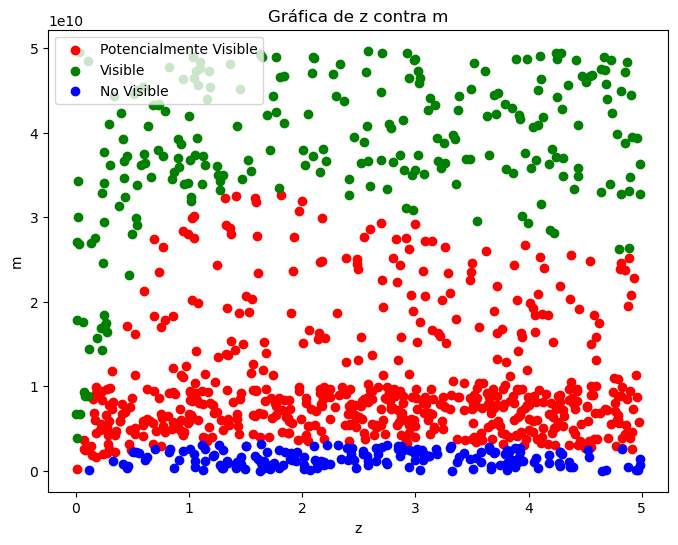

In [23]:
data.columns = ['z', 'm', 'radio', 'clase']  # Renombrar según corresponda

# Separamos los datos por clase
class_0 = data[data['clase'] == 0]
class_1 = data[data['clase'] == 1]
class_neg1 = data[data['clase'] == -1]

plt.figure(figsize=(8, 6))
plt.scatter(class_0['z'], class_0['m'], color='red', label='Potencialmente Visible')
plt.scatter(class_1['z'], class_1['m'], color='green', label='Visible')
plt.scatter(class_neg1['z'], class_neg1['m'], color='blue', label='No Visible')

plt.xlabel('z')
#plt.xscale('log')
#plt.yscale('log')

plt.ylabel('m')
plt.title('Gráfica de z contra m')
plt.legend()
plt.legend(loc='upper left')  # Coloca la leyenda en la esquina superior izquierda

plt.show()


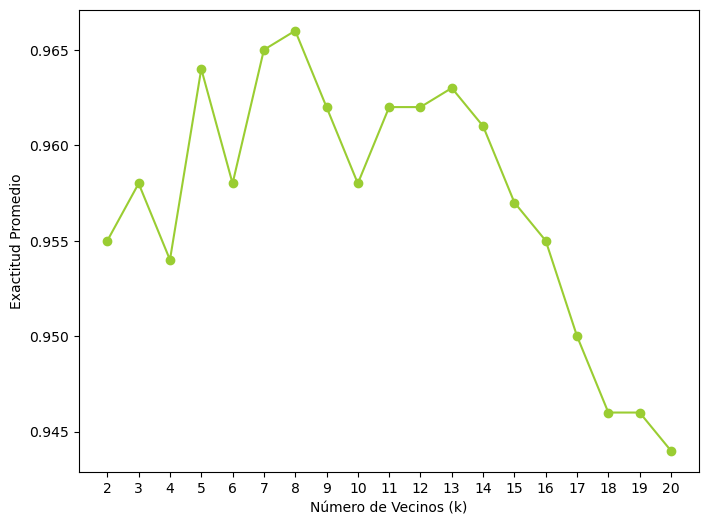

El valor óptimo de k es 8 con una exactitud promedio de 0.97


In [26]:
X = data.iloc[:, :2].values  # Usamos las primeras dos columnas como características
y = data['Clase'].values     # Usamos 'Clase' con mayúscula como objetivo

# Escalamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluamos el modelo para varios valores de k usando validación cruzada
k_range = range(2, 21)  # Probamos k desde 2 hasta 20
mean_accuracy = []  # Guardamos las medias de la exactitud para cada valor de k

# Evaluamos la exactitud promedio de cada k usando validación cruzada
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_accuracy.append(scores.mean())  # Promedio de la exactitud

# Graficamos la exactitud en función de k
plt.figure(figsize=(8, 6))
plt.plot(k_range, mean_accuracy, marker='o', linestyle='-', color='yellowgreen')
#plt.title('Exactitud Promedio vs k para KNN')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Exactitud Promedio')
plt.xticks(k_range)
plt.grid(False)
plt.savefig('eleccion_knn.png')
plt.show()

# Seleccionamos la k con la mejor exactitud
best_k = k_range[np.argmax(mean_accuracy)]
print(f"El valor óptimo de k es {best_k} con una exactitud promedio de {max(mean_accuracy):.2f}")


In [21]:
# Imprimir las columnas para verificar los nombres
print(data.columns)


Index(['redshift', 'masa', 'radio', 'Clase'], dtype='object')


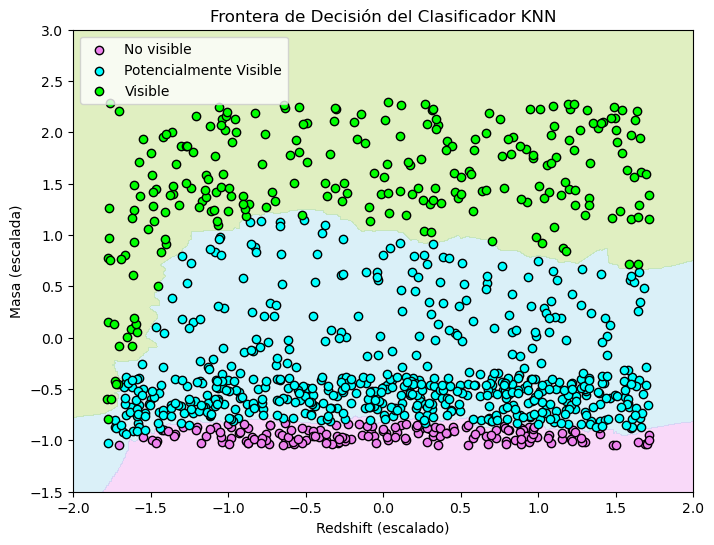

In [28]:
# Entrenamos el clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_scaled, y)

# Creamos un meshgrid para visualizar la frontera de decisión
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Realizamos predicciones sobre el meshgrid
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizamos la frontera de decisión y los puntos de entrenamiento
plt.figure(figsize=(8, 6))

# Definimos los colores específicos para cada clase y niveles
plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1.5, -0.5, 0.5, 1.5], colors=[ 'violet', 'skyblue', 'yellowgreen'])

# Graficamos puntos de clase -1 (No visible) 
plt.scatter(X_scaled[y == -1, 0], X_scaled[y == -1, 1], color='violet', marker='o', edgecolor='k', label="No visible")

# Graficamos puntos de clase 0 (Potencialmente)
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='cyan', marker='o', edgecolor='k', label="Potencialmente Visible")

# Graficamos puntos de clase 1 (Visible)
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='lime', marker='o', edgecolor='k', label="Visible")

# Configuramos las etiquetas y título
plt.title("Frontera de Decisión del Clasificador KNN")
plt.ylabel("Masa (escalada)")
plt.xlabel("Redshift (escalado)")
# Establecemos límites de los ejes
plt.xlim(-2, 2)  # Límites del eje X
plt.ylim(-1.5, 3)  # Límites del eje Y
plt.legend(loc='upper left')  # Colocmos la leyenda en la esquina superior izquierda
plt.savefig('knn_bhh.png')
plt.show()
